<a href="https://colab.research.google.com/github/mvalancius22/repo-5/blob/main/gene_rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gene Prioritization/Ranking

* Problem: Identifying and Prioritizing genes associated with disease
* For conducted experiments, a score (rating) is produced for each gene
* Sorting the genes by their ranks is *Induced Ranking*
* The position/index of gene in ranking is its rank


* Aggregate Ranking Methods 
    * Average-score-based ranking
    * Aggregate average ranking
    * Kendall based aggregate ranking

Genes likely to be associated with Autism (column 1). Header of column 2...n are type of experiment. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Github/repo-5/

/content/drive/MyDrive/Github/repo-5


In [3]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

lab_df1 = pd.read_excel('assignment3_data.xlsx', header=0)
lab_df1.head(len(lab_df1))

,GeneSymbol,GO: Molecular Function,GO: Biological Process,GO: Cellular Component,Domain
0,ACE,0.011425,0.012781,0.012974,0.506971
1,AKT1,0.068358,0.012006,0.017428,0.477661
2,APOE,0.039504,0.012006,0.018784,0.506971
3,APP,0.013749,0.012006,0.001356,0.188712
4,AR,0.005809,0.012006,0.030209,0.477661
5,AUTS2,0.088691,0.024787,0.188420,0.506971
6,AVPR1A,0.011425,0.012781,0.044926,0.477661
7,BDNF,0.039117,0.012006,0.006971,0.506971
8,CCND1,0.068358,0.038536,0.069132,0.477661
9,DRD2,0.003292,0.012006,0.004533,0.223395


## *Average-Score-Based Ranking*

In [4]:
lab_df1['Average'] = np.average(lab_df1.iloc[:, 1:5], axis=1)
lab_df1.loc[:,['GeneSymbol', 'Average']]

,GeneSymbol,Average
0,ACE,0.136038
1,AKT1,0.143863
2,APOE,0.144316
3,APP,0.053956
4,AR,0.131422
5,AUTS2,0.202217
6,AVPR1A,0.136698
7,BDNF,0.141266
8,CCND1,0.163422
9,DRD2,0.060807


Average-Score_Based Ranking (in non-decreasing order)

In [5]:
lab_df1.loc[:,['GeneSymbol', 'Average']].sort_values(by='Average')

,GeneSymbol,Average
12,EP300,0.048301
3,APP,0.053956
9,DRD2,0.060807
4,AR,0.131422
0,ACE,0.136038
6,AVPR1A,0.136698
7,BDNF,0.141266
10,EGFR,0.142767
1,AKT1,0.143863
2,APOE,0.144316


## *Aggregate Average Ranking*

In [6]:
lab_df1['Rank1'] = lab_df1['GO: Molecular Function'].rank()

In [7]:
lab_df1.sort_index()

,GeneSymbol,GO: Molecular Function,GO: Biological Process,GO: Cellular Component,Domain,Average,Rank1
0,ACE,0.011425,0.012781,0.012974,0.506971,0.136038,4.5
1,AKT1,0.068358,0.012006,0.017428,0.477661,0.143863,11.5
2,APOE,0.039504,0.012006,0.018784,0.506971,0.144316,9.5
3,APP,0.013749,0.012006,0.001356,0.188712,0.053956,6.0
4,AR,0.005809,0.012006,0.030209,0.477661,0.131422,3.0
5,AUTS2,0.088691,0.024787,0.188420,0.506971,0.202217,13.0
6,AVPR1A,0.011425,0.012781,0.044926,0.477661,0.136698,4.5
7,BDNF,0.039117,0.012006,0.006971,0.506971,0.141266,8.0
8,CCND1,0.068358,0.038536,0.069132,0.477661,0.163422,11.5
9,DRD2,0.003292,0.012006,0.004533,0.223395,0.060807,2.0


In [8]:
lab_df1['Rank2'] = lab_df1['GO: Biological Process'].rank()

In [9]:
lab_df1['Rank3'] = lab_df1['GO: Cellular Component'].rank()

In [10]:
lab_df1['Rank4'] = lab_df1['Domain'].rank()

In [11]:
lab_df1.sort_index()

,GeneSymbol,GO: Molecular Function,GO: Biological Process,GO: Cellular Component,Domain,Average,Rank1,Rank2,Rank3,Rank4
0,ACE,0.011425,0.012781,0.012974,0.506971,0.136038,4.5,9.5,5.0,11.0
1,AKT1,0.068358,0.012006,0.017428,0.477661,0.143863,11.5,4.5,6.0,6.5
2,APOE,0.039504,0.012006,0.018784,0.506971,0.144316,9.5,4.5,7.0,11.0
3,APP,0.013749,0.012006,0.001356,0.188712,0.053956,6.0,4.5,1.0,2.0
4,AR,0.005809,0.012006,0.030209,0.477661,0.131422,3.0,4.5,8.0,6.5
5,AUTS2,0.088691,0.024787,0.188420,0.506971,0.202217,13.0,11.0,12.0,11.0
6,AVPR1A,0.011425,0.012781,0.044926,0.477661,0.136698,4.5,9.5,9.0,6.5
7,BDNF,0.039117,0.012006,0.006971,0.506971,0.141266,8.0,4.5,3.0,11.0
8,CCND1,0.068358,0.038536,0.069132,0.477661,0.163422,11.5,12.0,10.0,6.5
9,DRD2,0.003292,0.012006,0.004533,0.223395,0.060807,2.0,4.5,2.0,3.5


In [12]:
lab_df1['Average Rank'] = np.average(lab_df1.iloc[:, 6:10], axis=1)
lab_df1.loc[:,['GeneSymbol', 'Average Rank']].sort_values(by='Average Rank')

,GeneSymbol,Average Rank
9,DRD2,3.000
3,APP,3.375
12,EP300,4.375
4,AR,5.500
7,BDNF,6.625
1,AKT1,7.125
10,EGFR,7.250
6,AVPR1A,7.375
0,ACE,7.500
2,APOE,8.000


## *Kendall Based Aggregate Ranking*

* For 2 rankings, KD is number of discordant pairs of symbols 
* if for ranking1: a < b, ranking2: a > b or vice versa (ranking1: a > b, ranking2: a < b)
* Kendall distance is sum of discordanant pairs. Note: this implimentation does not consider ties as discordanant pairs
* For each ranking, find sum of distances from n-1 rankings, then ranking for which the sum has minimum value. This is Kendall Aggregate Ranking

Text(0, 0.5, 'Kendall Distance')

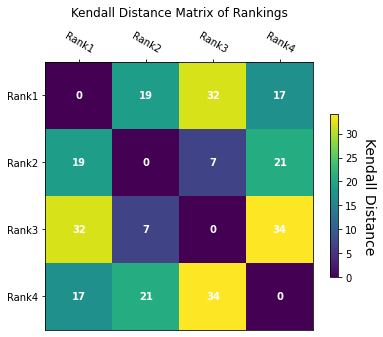

In [13]:
def sign_array(col):
    a, b = zip(*itertools.combinations(lab_df1[col], 2))
    return (np.sign(np.array(a) - np.array(b)))

rank_array = np.array([sign_array(rank) for rank in lab_df1.columns[6:10]])
l = [np.count_nonzero(rank_array[i] + rank_array[i+1:], axis = 1) for i in range(3)]

matr = np.zeros((4,4),dtype=int)
matr[np.triu_indices(4,1)] = rank_array.shape[1] - np.hstack(l)
matr[np.tril_indices(4,-1)] = matr.T[np.tril_indices(4, -1)]

fig, ax = plt.subplots(figsize=(6,6))
a = ax.imshow(matr)
ax.set_xticks(np.arange(matr.shape[0]))
ax.set_yticks(np.arange(matr.shape[1]))
ax.set_xticklabels(lab_df1.columns[6:10],rotation=-30)
ax.set_yticklabels(lab_df1.columns[6:10])
ax.tick_params(top=True, bottom=False,
               labeltop=True, labelbottom=False)
ax.set_title('Kendall Distance Matrix of Rankings',pad=14)
for i in range(4):
    for j in range(4):
        text = ax.text(j, i, matr[i, j],
                       ha="center", va="center", color="w", fontweight='bold')
cbar = fig.colorbar(a, ax=ax, shrink=0.5)
cbar.ax.set_ylabel(ylabel = 'Kendall Distance',rotation=-90, va="bottom",fontsize=14)